In [31]:
from causallib.estimation import Matching
from causallib.evaluation import OutcomeEvaluator
from causallib.datasets import load_nhefs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

%load_ext autoreload
%autoreload 2


sb.set("notebook")
n,k=100,10
X=pd.DataFrame(np.hstack([np.arange(n),np.arange(k)]))
a=pd.Series(np.hstack([np.zeros(n),np.ones(k)]))
y=pd.Series(np.hstack([np.arange(n),2*np.arange(k)]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
hotels = pd.read_csv('https://raw.githubusercontent.com/Sid-darthvader/DoWhy-The-Causal-Story-Behind-Hotel-Booking-Cancellations/master/hotel_bookings.csv')
hotels.shape


In [54]:
police = pd.read_stata("/home/micha/POL0924.dta")
police.

Object `police.unmelt` not found.


In [18]:
m=Matching()
m.fit(x,a,y)
m.with_replacement = True
m.caliper=0.1
m.n_neighbors=10
match_df = m.match(x,a)
match_to_zero = match_df.loc[0]
match_to_one = match_df.loc[1]
matched_indices_0 = match_to_zero[a==1].matches.apply(lambda x: x[0] if x else np.nan).dropna().values
matched_indices_1 = match_to_one[a==0].matches.apply(lambda x: x[0] if x else np.nan).dropna().values
zero_indices =  x[a == 0].index.values
one_indices =  x[a == 1].index.values

In [41]:
mest = MatchingIndividualOutcomeEstimator()
mest.fit(x,a,y)
mest
42.23/8

5.27875

/home/micha/CausalInference/causallib/evaluation/evaluator.py:149: UserWarning: While evaluating msle: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
  warnings.warn('While evaluating ' + metric_name + ': ' + str(v))
/home/micha/CausalInference/causallib/evaluation/evaluator.py:149: UserWarning: While evaluating msle: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
  warnings.warn('While evaluating ' + metric_name + ': ' + str(v))
/home/micha/CausalInference/causallib/evaluation/evaluator.py:149: UserWarning: While evaluating msle: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
  warnings.warn('While evaluating ' + metric_name + ': ' + str(v))
/home/micha/CausalInference/causallib/evaluation/evaluator.py:149: UserWarning: While evaluating msle: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
  warnings.warn('While evaluating ' + metric_name +

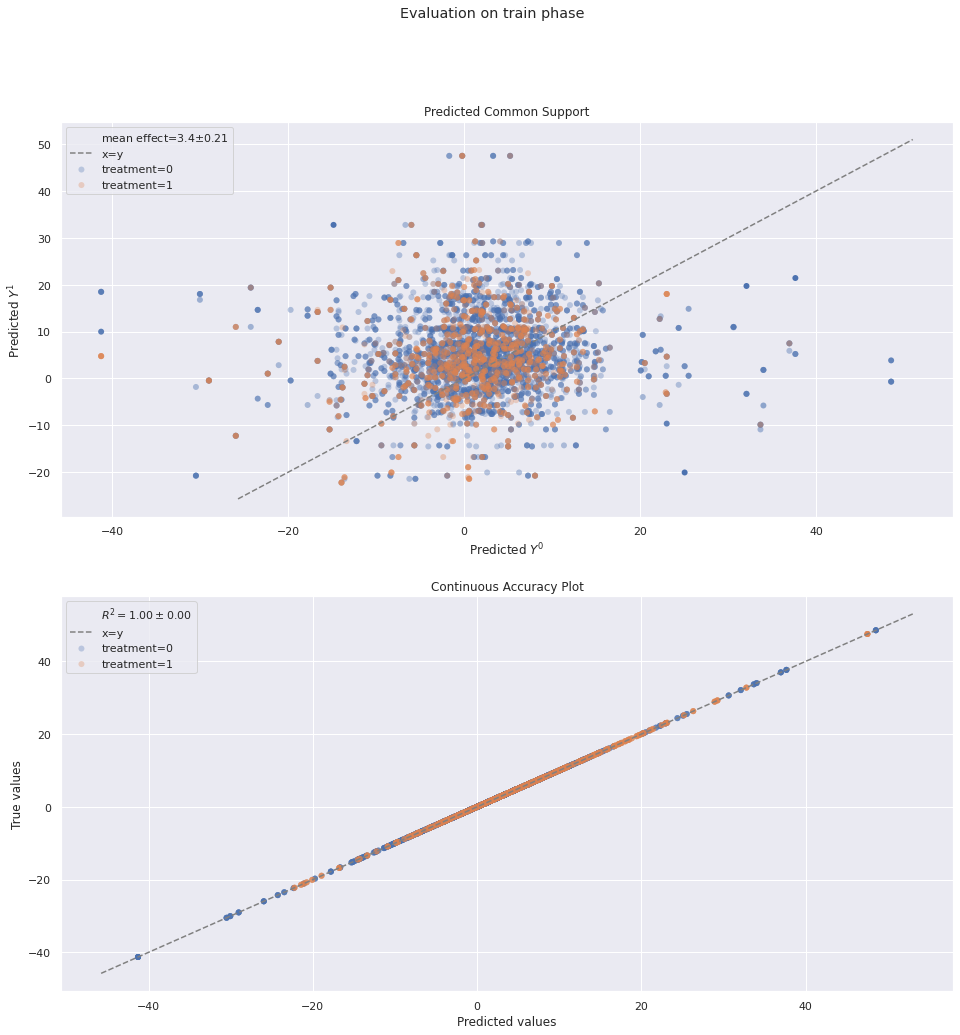

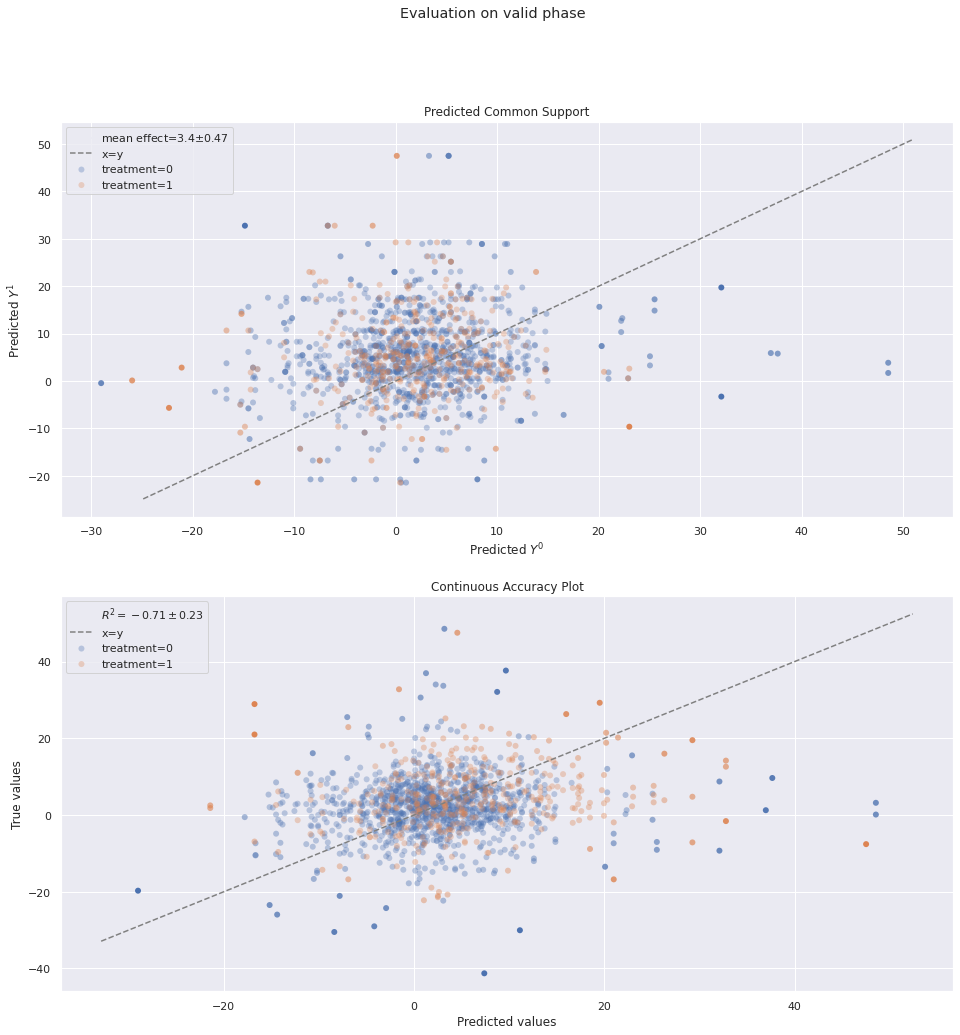

In [42]:
plots=["common_support", "continuous_accuracy"]
data = load_nhefs()
evaluator = OutcomeEvaluator(MatchingIndividualOutcomeEstimator())
results = evaluator.evaluate_cv(data.X, data.a, data.y,
                                plots=plots)

In [73]:
x, a = make_classification(n_features=3, n_samples=1000,n_informative=3, n_redundant=0, n_repeated=0, n_classes=2,
                                   n_clusters_per_class=1, flip_y=0.0, class_sep=1.0)
%pdb off
x=pd.DataFrame(x)
a=pd.Series(a)
y = x@(.1,.2,.3) + 5*a

naive = (y[a==1].mean() - y[a==0].mean())
print(naive)
m=Matching()
m.fit(x,a,y)
m.with_replacement = True
m.caliper = None
m.match(x,a)
d0 = m.match_df_.loc[0][a!=0].distances.apply(lambda x: x[0] if x else np.nan).dropna().values
d1 = m.match_df_.loc[1][a!=1].distances.apply(lambda x: x[0] if x else np.nan).dropna().values
print(np.hstack([d0,d1]).shape)
print(m.estimate_population_outcome(x,a).diff()[1])

m.caliper = np.quantile( np.hstack([d0,d1]),0.1,)
m.with_replacement = True
m.match(x,a)

d0 = m.match_df_.loc[0][a!=0].distances.apply(lambda x: x[0] if x else np.nan).dropna().values
d1 = m.match_df_.loc[1][a!=1].distances.apply(lambda x: x[0] if x else np.nan).dropna().values
print(np.hstack([d0,d1]).shape)

print(m.estimate_population_outcome(x,a).diff()[1])

Automatic pdb calling has been turned OFF
4.184144099888398
(1000,)
4.588743832109707
(100,)
4.981780604054935


In [74]:
len(x)

1000

In [44]:
make_classification?

In [91]:
pd.DataFrame(np.random.rand(5,3)).apply(lambda x: pd.Series(x.name**4 * np.array((x[0],x[1]))),axis=1)

,0,1
0,0.000000,0.000000
1,0.378298,0.190429
2,4.911618,10.772209
3,56.606960,50.497360
4,104.758775,181.091469


In [94]:
[1][:1]

[1]

In [96]:
def do_something(row):
    row[0] = "xtf"
    row[1] = "saf"
    return row
pd.DataFrame(np.random.rand(5,3)).apply(do_something,axis=1)

,0,1,2
0,xtf,saf,0.129195
1,xtf,saf,0.717517
2,xtf,saf,0.153905
3,xtf,saf,0.339268
4,xtf,saf,0.446818


In [98]:
    def test_match_on_multiple_covariates_with_no_replacement_and_caliper():
        matching = Matching()
        x, a = make_classification(
            n_features=3,
            n_samples=500,
            n_informative=2,
            n_redundant=0,
            n_repeated=0,
            n_classes=2,
            n_clusters_per_class=1,
            flip_y=0.0,
            class_sep=1.0,
            random_state=5432,
        )
        x = (
            pd.DataFrame(x)
            .assign(treatment=a)
            .assign(outcome=x @ (0.1, 0.2, 0.3) + 5 * a)
        )
        a = x.pop("treatment")
        y = x.pop("outcome")

        # pull naive effect estimate
        naive_ate = y[a == 1].mean() - y[a == 0].mean()

        # now do the no caliper distance and effect estimates
        matching.fit(x, a, y)
        matching.with_replacement = False
        matching.caliper = None
        matching.match(x, a)

        d0 = (
            matching.match_df_.loc[0][a != 0]
            .distances.apply(lambda x: x[0] if x else np.nan)
            .dropna()
            .values
        )
        d1 = (
            matching.match_df_.loc[1][a != 1]
            .distances.apply(lambda x: x[0] if x else np.nan)
            .dropna()
            .values
        )

        match_distances_no_caliper = np.hstack([d0, d1])
        no_caliper_ate = matching.estimate_population_outcome(x, a).diff()[1]

        # with no caliper we should get exactly as many valid matches as samples
        #self.assertEqual(match_distances_no_caliper.shape[0], len(x))
        # and the ate estimate should be exactly as good as the naive estimate because there is no caliper
        # and the groups are balanced
        #self.assertAlmostEqual(abs(5 - no_caliper_ate), abs(5 - naive_ate))

        matching.caliper = np.quantile(match_distances_no_caliper, 0.01)

        # now do the caliper constrained distance and effect estimate
        matching.with_replacement = False
        matching.match(x, a)

        d0 = (
            matching.match_df_.loc[0][a != 0]
            .distances.apply(lambda x: x[0] if x else np.nan)
            .dropna()
            .values
        )
        d1 = (
            matching.match_df_.loc[1][a != 1]
            .distances.apply(lambda x: x[0] if x else np.nan)
            .dropna()
            .values
        )
        match_distances_with_caliper = np.hstack([d0, d1])
        caliper_ate = matching.estimate_population_outcome(x, a).diff()[1]

        # with a caliper there will be fewer matches
        #self.assertLess(
        #    match_distances_with_caliper.shape[0], match_distances_no_caliper.shape[0]
        #)
        # and the ate estimate should be EVEN closer to the ground truth effect of 5
        #self.assertLess(abs(5 - caliper_ate), abs(5 - no_caliper_ate))


In [104]:
%pdb off
test_match_on_multiple_covariates_with_no_replacement_and_caliper()

Automatic pdb calling has been turned OFF


In [150]:
n = 100
k = 10
x = pd.DataFrame(np.hstack([np.arange(n), np.arange(k)]))
a = pd.to_numeric(
    pd.Series(np.hstack([np.zeros(n), np.ones(k)])), downcast="integer"
)
y = pd.Series(np.hstack([np.arange(n), 2 * np.arange(k)]))
def test_covariate_matching(x,a,y):
    m=Matching()
    m.fit(x,a,y)
    m.n_neighbors = 10
    m.with_replacement = True
    m.caliper = None
    return m.match(x,a)
  

In [151]:
treatment_value = 1
def limit_within_treatment_matches_to_self_only(row):
    if a.loc[row.name] == treatment_value:
        row.matches = row.matches[:1]
        row.distances = row.distances[:1]
    return row
match_df = test_covariate_matching(x,a,y)

In [153]:
match_df.loc[treatment_value]

,distances,matches
sample_id,,
0,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[100, 101, 102, 103, 104, 105, 106, 107, 108, ..."
1,"[0.0, 1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[101, 100, 102, 103, 104, 105, 106, 107, 108, ..."
2,"[0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, ...","[102, 101, 103, 100, 104, 105, 106, 107, 108, ..."
3,"[0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, ...","[103, 102, 104, 101, 105, 100, 106, 107, 108, ..."
4,"[0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, ...","[104, 103, 105, 102, 106, 101, 107, 100, 108, ..."
...,...,...
105,[0.0],[105]
106,[0.0],[106]
107,[0.0],[107]


Demonstration of Imbens-Rubin Bias Correcting Estimators on Card-Krueger unemployment data

Incorrect argument. Use on/1, off/0, or nothing for a toggle.


In [3]:
#Table 18.3 -- this is an arbitrary selection of data samples from the full data set. 
# We copy it here so that we can reproduce their results perfectly.

NJ,PA = [1,0]
BK,KFC=[0,1]
x=pd.DataFrame([dict(unit=1, state=NJ, chain=BK, emptot=22.5, emptot2=40.0),
dict(unit=2, state=NJ, chain=KFC, emptot= 14.0, emptot2=12.5),
dict(unit=3, state=NJ, chain=BK, emptot= 37.5, emptot2=20.0),
dict(unit=4, state=NJ, chain=KFC, emptot=9.0, emptot2=3.5),
dict(unit=5, state=NJ, chain=KFC, emptot=8.0, emptot2=5.5),
dict(unit=7, state=PA, chain= KFC, emptot= 13.8, emptot2=17.0),
dict(unit=8, state=PA, chain= KFC, emptot= 8.5, emptot2=10.5),
dict(unit=11, state=PA, chain= BK, emptot= 20.0, emptot2=19.5),
dict(unit=15, state=PA, chain= BK, emptot= 32.5, emptot2=22.5),
dict(unit=20, state=PA, chain= BK, emptot= 8.0, emptot2=8.0),]).set_index("unit")
#x=pd.get_dummies(x,prefix="name",columns=["chain"]).rename(columns=dict(name_1="BK",name_2="KFC")).rename(columns={"name_BK":"BK","name_KFC":"KFC"})
y = x.pop("emptot2")
a = x.pop("state")

m=Matching()
m.fit(x,a,y)
m.with_replacement=False
m.match(x,a)
%pdb on
covmatch = m.get_covariates_of_matches(1,0)

#yhat_d_,yhat_c_,yhat_p_ = m.bias_correcting_estimated_outcome(1,0)
#abs(yhat_d - yhat_d_).sum() + abs(yhat_c - yhat_c_).sum() + abs(yhat_p_ - yhat_p).sum()

bias = m.bias_correcting_estimated_outcome(1,0)
bias_df = pd.concat(dict(((k,i["fit"].params) for k,i in bias.items())),axis=1)
bias_df.loc["tau"] = pd.Series(dict(((k,i["tau"]) for k,i in bias.items())))

bias_df

Automatic pdb calling has been turned ON


,difference,control,pooled
const,-1.301086,4.206307,12.009494
chain,1.198914,2.654453,-7.317252
emptot,-1.427359,0.617869,0.387525
treatment,NaN,NaN,1.627910
tau,-1.301086,-0.744196,1.627910


In [730]:
covmatch[0].sample_id.append(covmatch[1].sample_id)


0     7.0
1     8.0
2    11.0
3    15.0
4    20.0
0     2.0
1     4.0
2     1.0
3     3.0
4     5.0
Name: sample_id, dtype: float64

In [702]:
subdf = m.match_df_.loc[0][m.treatments_==1].copy()
i=1
j=subdf.loc[1].matches[0]
raw_covariates = m.covariates_.copy()
source_row = raw_covariates.loc[j].copy()
target_row = raw_covariates.loc[i].copy()

pd.DataFrame([pd.concat({1:target_row,0:source_row})])

1            0       
  chain emptot chain emptot
0   0.0   22.5   0.0   20.0

Difference Regression

In [524]:
params_d = sm.OLS(covmatch.outcomes[1] - covmatch.outcomes[0], sm.add_constant(covmatch.delta)).fit().params
params_d

const    -1.301086
chain     1.198914
emptot   -1.427359
dtype: float64

In [525]:
yhat_d = covmatch.outcomes[0] + covmatch.delta @ params_d[1:]
yhat_d

sample_id
11    23.068398
7     17.285472
15    29.636796
8     11.213680
20     6.801086
dtype: float64

In [526]:
(covmatch.outcomes[1] - covmatch.outcomes[0]).mean()

0.8

In [527]:
(covmatch.outcomes[1] -yhat_d).mean()

-1.3010862186014884

Control Regression

In [528]:
params_c = sm.OLS(covmatch.outcomes[0],sm.add_constant(covmatch[0].drop(columns="sample_id"))).fit().params
params_c

const     4.206307
chain     2.654453
emptot    0.617869
dtype: float64

In [529]:
yhat_c = -covmatch.delta @ params_c[1:] + covmatch.outcomes[0]
yhat_c

sample_id
11    21.044673
7     17.123574
15    25.589345
8     10.808935
20    10.654453
dtype: float64

In [530]:
(covmatch.outcomes[1] -yhat_c).mean()

-0.7441957915842281

Pooled Regression

In [531]:
x_p = covmatch[1].append(covmatch[0]).drop(columns=["sample_id"]).reset_index().join(a.reset_index()).drop(columns=["sample_id","unit"])


In [532]:
params_p = sm.OLS(covmatch.outcomes[1].append(covmatch.outcomes[0]).values, sm.add_constant(x_p)).fit().params
params_p

const     12.009494
chain     -7.317252
emptot     0.387525
state      1.627910
dtype: float64

In [533]:
covmatch.delta

,chain,emptot
sample_id,,
11,0.0,-2.5
7,0.0,-0.2
15,0.0,-5.0
8,0.0,-0.5
20,-1.0,0.0


In [544]:
yhat_p = covmatch.outcomes[0] + (-covmatch.delta @ params_p[1:(len(params_p)-1)])
yhat_p.sort_index()

sample_id
7     17.077505
8     10.693762
11    20.468811
15    24.437623
20     0.682748
dtype: float64

In [543]:
yhat_p_.sort_index()

sample_id
7     17.123574
8     10.808935
11    21.044673
15    25.589345
20    10.654453
dtype: float64

In [535]:
(covmatch.outcomes[1] - yhat_p).mean()

1.6279100598818335

Same as the "state" coefficient!

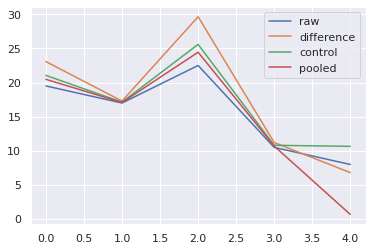

In [536]:
plt.plot(covmatch.outcomes[0].values,label="raw")
plt.plot(yhat_d.values,label="difference")
plt.plot(yhat_c.values,label="control")
plt.plot(yhat_p.values,label="pooled")
plt.legend()

In [12]:
from causallib.datasets import load_card_krueger_data
data = load_card_krueger_data()
x,a,y = data.x,data.a,data.y

In [14]:
a

3      0
4      0
6      0
7      0
8      0
      ..
405    1
406    1
407    1
408    1
409    1
Name: STATE, Length: 347, dtype: int64

In [45]:
def test_match(metric,s_t,n_neighbors):
    m = Matching()
    s,t=s_t
    m.with_replacement = False
    m.metric = metric
    m.n_neighbors = n_neighbors
    m.fit(x,a,y)
    m.match(x,a)
    covmatch = m.get_covariates_of_matches(s,t)
    return covmatch

def test_bias(metric,s_t,n_neighbors):
    m = Matching()
    s,t=s_t
    m.with_replacement = True
    m.metric = metric
    m.n_neighbors = n_neighbors
    m.fit(x,a,y)
    m.match(x,a)
    bias = m.bias_correcting_estimated_outcome(s,t)
    return bias
%pdb off


Automatic pdb calling has been turned OFF


In [46]:
assert("%.2f"%sm.OLS(y,sm.add_constant(a)).fit().params.STATE == "-0.22")
assert("%.2f"%sm.OLS(y,sm.add_constant(x.join(a))).fit().params.STATE == "1.35")


In [50]:
nj = (0,1)
pa = (1,0)
%pdb on
Y = test_match("mahalanobis",nj,1).outcomes
print(("NJ",1,"M", f"{(Y[1] - Y[0]).mean():.2f}?=0.89"))
#Y = test_match("mahalanobis",nj,4).outcomes
#print(("NJ",4,"M", f"{(Y[1] - Y[0]).mean():.2f}?=1.01"))
Y = test_match("euclidean",nj,1).outcomes
print(("NJ",1,"E", f"{(Y[1] - Y[0]).mean():.2f}?=0.93"))
Y = test_match("mahalanobis",pa,1).outcomes
print(("PA",1,"M", f"{(Y[1] - Y[0]).mean():.2f}?=0.63"))
Y=test_match("mahalanobis",pa,1).outcomes.append(test_match("mahalanobis",nj,1).outcomes)
print(("ALL",1,"M", f"{(Y[1] - Y[0]).mean():.2f}?=0.84"))
bias = test_bias("euclidean",nj,1)
print(("NJ",1,"E", "d", f"{(bias['difference']['tau']):.2f}?=0.51"))
print(("NJ",1,"E", "c", f"{(bias['control']['tau']):.2f}?=0.71"))
print(("NJ",1,"E", "p", f"{(bias['pooled']['tau']):.2f}?=0.79"))

Automatic pdb calling has been turned ON
('NJ', 1, 'M', '1.35?=0.89')
('NJ', 1, 'E', '1.56?=0.93')
('PA', 1, 'M', '1.35?=0.63')
('ALL', 1, 'M', '1.35?=0.84')
('NJ', 1, 'E', 'd', '-1.39?=0.51')
('NJ', 1, 'E', 'c', '-1.68?=0.71')
('NJ', 1, 'E', 'p', '-1.75?=0.79')


In [55]:
print(bias["pooled"].keys())
params = bias["pooled"]["params"]
x_p = bias["pooled"]["x"]
y_p = bias["pooled"]["y"]
yhat_p = bias["pooled"]["yhat"]
y


dict_keys(['x', 'y', 'fit', 'params', 'yhat', 'tau'])


3      18.00
4      29.50
6      24.00
7      30.50
8       9.00
       ...  
405    20.75
406    13.50
407    17.50
408    17.50
409    22.00
Name: EMPTOT2, Length: 347, dtype: float64

In [44]:
bias["pooled"]["yhat"].sort_index()

0       6.097165
1      13.983509
2      19.433704
3       5.701209
4      18.295027
         ...    
274    20.707660
275    13.798317
276    17.500000
277    16.328555
278    23.666979
Length: 279, dtype: float64

In [581]:
(covmatch.outcomes[1] - yhat_d).mean()

1.5694638314564704

In [582]:
(covmatch.outcomes[1] - yhat_c).mean()

2.1423628063782174

In [583]:
(covmatch.outcomes[1] - yhat_p).mean()

2.1423628063782156

In [584]:
(covmatch.outcomes[1] - covmatch.outcomes[0]).mean()

1.9338235294117647

In [289]:
covmatch = m.get_covariates_of_matches(1,0)
yreg = covmatch.outcomes[1] - covmatch.outcomes[0]
xreg = (covmatch[1] - covmatch[0]).drop(columns=["sample_id","BK"])
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#xreg_s = StandardScaler().fit_transform(xreg)
#xreg_sp = PCA(n_components=4).fit_transform(xreg_s)


In [290]:
model = sm.OLS(yreg,sm.add_constant(xreg))
reg = model.fit()
reg.summary()

/home/micha/causal/lib/python3.8/site-packages/statsmodels-0.12.0-py3.8-linux-x86_64.egg/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.205
Date:                Sun, 29 Nov 2020   Prob (F-statistic):              0.327
Time:                        15:08:54   Log-Likelihood:                -140.51
No. Observations:                  39   AIC:                             291.0
Df Residuals:                      34   BIC:                             299.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7454      1.591      1.726      0.093      -0.487       5.978
EMPTOT        -0.0758      0.458     -0.165      0.870      -1.007       0.855
WAGE_ST      -22.1962     11.297     -1.965      0.058     -45.154       0.762
INCTIME        0.4240      0.323      1.313      0.198      -0.232       1.081
KFC           -1.5538      4.895     -0.317      0.753     -11.503       8.395
ROYS           1.5538      4.895      0.317      0.753      -8.395      11.503
WENDYS              0          0        nan        nan           0           0
==============================================================================
Omnibus:                        8.054   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.788
Skew:                           0.884   Prob(JB):                       0.0336
Kurtosis:                       4.026   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [293]:
D.T@D

,EMPTOT,WAGE_ST,INCTIME,KFC,ROYS,WENDYS
EMPTOT,454.355769,-0.816731,124.75,-1.634615,1.634615,0.0
WAGE_ST,-0.816731,0.754636,4.60,-0.127949,0.127949,0.0
INCTIME,124.750000,4.600000,934.00,0.000000,0.000000,0.0
KFC,-1.634615,-0.127949,0.00,0.974359,-0.974359,0.0
ROYS,1.634615,0.127949,0.00,-0.974359,0.974359,0.0
WENDYS,0.000000,0.000000,0.00,0.000000,0.000000,0.0


In [292]:
D = xreg - xreg.mean(axis=0)
beta_d = np.linalg.inv(D.T@D) @ (D.T @ (covmatch.outcomes[1] - covmatch.outcomes[0]).values.reshape((-1,1)))
yhat0 = covmatch.outcomes[0] + (xreg_sp @ beta_d).flatten()
(covmatch.outcomes[1] - yhat0).mean()

LinAlgError: Singular matrix

In [235]:
(covmatch.outcomes[1] - covmatch.outcomes[0] - (D @ beta_d).flatten()).mean()


1.212686567164179

In [236]:
(beta_d)

array([[ 2.20114202],
       [-0.50358822],
       [ 1.34324503],
       [-0.69646429]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 67)

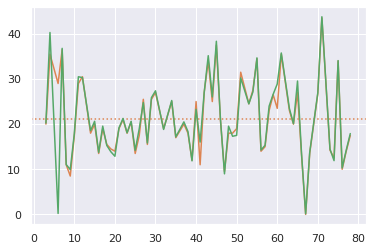

In [250]:
plt.plot(covmatch.outcomes[0],color="C1")
plt.axhline(covmatch.outcomes[0].mean(),ls=":",color="C1")
plt.plot(covmatch.outcomes[0] - (D @ beta_d).flatten(),color="C2" )
plt.axhline((covmatch.outcomes[0] - (D.mean(axis=1) @ beta_d).flatten()),ls=":",color="C2")
plt.plot(covmatch.outcomes[0] - (xc_sp @ beta_c).flatten(),color="C3" )
plt.axhline((covmatch.outcomes[0] - (xc_sp @ beta_c).flatten()).mean(),ls=":",color="C3")



In [259]:

D.mean(axis=0) 

array([ 1.24278697e-18,  6.62819716e-18, -1.65704929e-18,  1.15993450e-17])

In [244]:
xc = covmatch[0].drop(columns="sample_id")
xc_sp = PCA(n_components=4).fit_transform(StandardScaler().fit_transform(xc))
xc_sp = xc_sp - xc_sp.mean(axis=0)
beta_c = np.linalg.inv(xc_sp.T @ xc_sp) @ (xc_sp.T @ covmatch.outcomes[0].values.reshape((-1,1)))

In [264]:
D

array([[-1.11156317e-01, -2.05906175e-01, -5.44474045e-02,
         2.75959416e-02],
       [-1.00103957e+00,  3.64092147e+00, -4.21789575e-01,
         2.76236103e-01],
       [ 1.18848863e+01,  1.54124691e+00,  2.19043828e+00,
        -6.61698317e-01],
       [-2.08463236e-01, -1.19156930e-01,  1.97898588e-03,
        -1.57387262e-01],
       [ 2.29417899e-01, -5.09528531e-01, -2.51939771e-01,
         6.75037156e-01],
       [-2.78660038e-01,  7.76195129e-01, -1.98233844e-01,
         2.38348462e-01],
       [ 9.27611994e-01, -3.67218769e-01, -2.22550342e+00,
        -5.21567246e-01],
       [-1.70747770e+00,  1.40531709e+00,  1.46358928e+00,
        -1.44280052e+00],
       [ 6.67299035e-01, -8.99900132e-01, -5.05858527e-01,
         1.50746157e+00],
       [-6.94997830e-01,  3.14589293e-01,  2.84110938e-01,
        -1.08230328e+00],
       [ 5.14057589e-01,  1.46552114e-03, -1.98569127e+00,
        -1.30774586e+00],
       [-1.11156317e-01, -2.05906175e-01, -5.44474045e-02,
      

In [246]:
beta_d

array([[ 2.20114202],
       [-0.50358822],
       [ 1.34324503],
       [-0.69646429]])

In [260]:
xc_sp.mean(axis=0)

array([-6.62819716e-18, -1.15993450e-17,  2.31986901e-17,  2.07390075e-17])

In [21]:
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from causallib.estimation import MatchingTransformer
mt=MatchingTransformer()


In [25]:
p = pipeline.make_pipeline(StandardScaler(),PCA(),)

In [29]:
a.shape

(110,)

In [44]:
out = LogisticRegression().fit(x,a)

In [45]:
out

LogisticRegression()

In [47]:
out.set_params(solver="liblinear")

LogisticRegression(solver='liblinear')

In [5]:
from causallib.estimation import Matching
from sklearn.neighbors import NearestNeighbors
from causallib.datasets import load_nhefs
data = load_nhefs()
X,a,y = data.X,data.a,data.y
m = Matching()
m.knn_backend = lambda : NearestNeighbors(metric="manhattan")
m.fit(X,a,y)
m.estimate_population_outcome(X,a)

0    1.730861
1    5.480453
dtype: float64

In [7]:
m.treatment_knns_[0]

KNN(learner=NearestNeighbors(metric='manhattan'), index=Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1627],
           dtype='int64', length=1163))

In [22]:
import causallib
import pandas as pd

In [10]:
causallib.estimation.__dict__["Matching"]()

In [11]:
import yaml
from yaml import Loader


In [12]:
from sklearn.linear_model import LogisticRegression

In [24]:

estimator_namelist = ["IPW","Standardization","MatchingIndividualOutcomeEstimator"]

def lookup_type(type_name):
    if type_name == "LogisticRegression":
        this_type = LogisticRegression
    elif type_name == "LinearRegression":
        this_type = LinearRegression
    elif type_name in estimator_namelist:
        this_type = causallib.estimation.__dict__[type_name]

    else:
        raise NotImplementedError("Type not supported")
    return this_type

def instantiate_args(argdict):
    for argname,argval in argdict.items():
        if isinstance(argval,dict) and "type" in argval:
            this_type = lookup_type(argval["type"])
            argdict[argname] = this_type(**instantiate_args(argval["args"]))
    return argdict


In [25]:
manifest = yaml.load(open("/home/micha/ciaas/job.yml"),Loader=Loader)
data = pd.read_csv("/home/micha/CausalInference/causallib/datasets/data/nhefs/NHEFS.csv")
instantiate_args(manifest)


{'apiVersion': 'v1',
 'type': 'EffectEstimation',
 'estimator': IPW(truncate_eps=None, use_stabilized=True,
     learner=LogisticRegression(class_weight='balanced', max_iter=5000, solver='liblinear')),
 'covariates': [{'name': 'active', 'dtype': 'float', 'preprocess': None},
  {'name': 'age', 'dtype': 'int', 'preprocess': None},
  {'name': 'education', 'dtype': 'int', 'preprocess': None},
  {'name': 'exercise', 'dtype': 'bool', 'preprocess': None},
  {'name': 'race', 'dtype': 'bool', 'preprocess': None},
  {'name': 'sex', 'dtype': 'bool', 'preprocess': None},
  {'name': 'smokeintensity', 'dtype': 'int', 'preprocess': None},
  {'name': 'smokeyrs', 'dtype': 'int', 'preprocess': None},
  {'name': 'wt71', 'dtype': 'float', 'preprocess': None}],
 'treatment': {'name': 'qsmk', 'dtype': 'int'},
 'outcome': {'name': 'wt82_71', 'dtype': 'float'}}

In [55]:
names = ["covariates", "treatment", "outcome"]
def restrict_data_to(data_name):
    if isinstance(manifest[data_name],list):
        dtypedict = dict(
            (i["name"], i["dtype"]) for i in manifest[data_name] if "dtype" in i
        )
        return data[[i["name"] for i in manifest[data_name]]].astype(dtypedict)
    elif isinstance(manifest[data_name],dict):
        dtypedict = {manifest[data_name]["name"] : manifest[data_name]["dtype"]}
        return data[[manifest[data_name]["name"]]].astype(dtypedict)
names = ["covariates", "treatment", "outcome"]
all_data = pd.concat(dict((name, restrict_data_to(name)) for name in names),axis=1)


In [81]:
X, a, y = [all_data[name] for name in names]
a = a.squeeze()
y = y.squeeze()

In [82]:
ipw = IPW(learner=LogisticRegression()).fit(X,a)

/home/micha/causal/lib/python3.8/site-packages/scikit_learn-0.23.2-py3.8-linux-x86_64.egg/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
ipw.estimate_population_outcome(X,a,y)

0   NaN
1   NaN
dtype: float64

In [84]:
a

0       0
1       0
2       0
3       0
4       0
       ..
1624    0
1625    0
1626    0
1627    0
1628    1
Name: qsmk, Length: 1629, dtype: int64

In [6]:
x = [1,3,5,6]
y = ["a","b","d","a"]
#x,y = zip(*(filter(lambda x: x[0] <2, zip(x,y))))

In [12]:
x,y = list(zip(*[(i,j) for i,j in zip(x,y) if i<4]))

In [13]:
x

(1, 3)

In [4]:
y = pd.DataFrame(np.random.rand(5,5))
y

,0,1,2,3,4
0,0.128146,0.380242,0.980254,0.517593,0.092721
1,0.583876,0.027536,0.324795,0.226928,0.450302
2,0.599025,0.141896,0.879578,0.303035,0.372370
3,0.864324,0.259428,0.210445,0.416970,0.891142
4,0.009171,0.129325,0.889239,0.766155,0.865326


In [13]:
from sklearn.neighbors import NearestNeighbors,DistanceMetric
from causallib.estimation import PropensityMatching

In [36]:
data = load_nhefs(augment=False, onehot=False)
X, a, y = data.X, data.a, data.y

In [70]:
def logodds(x):
    return np.log( x / (1 - x))
def logodds_distance(x,y):
    return np.abs(logodds(x) - logodds(y))

dm=DistanceMetric.get_metric(logodds_distance)
logodds_knn = NearestNeighbors( metric=logodds_distance)
pm = PropensityMatching(
    learner=LogisticRegression(solver="liblinear"),
    knn_backend=logodds_knn,
    with_replacement=False,
    ).fit(X,a,y)
pm.estimate_population_outcome(X,a
    ).diff()
pm2 = PropensityMatching(
    learner=LogisticRegression(solver="liblinear"),knn_backend="sklearn"
    ).fit(X,a,y)
pm2.estimate_population_outcome(X,a).diff()

0         NaN
1    2.776487
dtype: float64

0         NaN
1    2.745408
dtype: float64

In [69]:
(pm.match_df_.loc[0][a==1]).join(pm2.match_df_.loc[0][a==1],lsuffix="log").sort_values("distanceslog")

,distanceslog,matcheslog,distances,matches
sample_id,,,,
229,[2.3625801803817126e-06],[1603],[3.8581508060575587e-07],[1603]
324,[6.105931056321623e-06],[1465],[1.3682428471328834e-06],[1465]
1457,[7.502653565527595e-06],[688],[1.613431580893554e-06],[688]
1433,[1.2197189738660796e-05],[531],[2.3401301019188026e-06],[531]
1368,[1.3675921914257927e-05],[1074],[2.2797770400651007e-06],[1074]
...,...,...,...,...
591,[0.04781098016327469],[694],[0.011911585082588383],[694]
125,[0.059324799178100615],[694],[0.014774672935151334],[694]
198,[0.06188513317869644],[694],[0.015411005911834308],[694]
